Top Right： choose spatial_gpu_final

In [1]:
import sys
print(sys.executable)

/home/zhen/miniforge3/envs/spatial_gpu_final/bin/python


In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt

/home/zhen/miniforge3/envs/spatial_gpu_final/lib/python3.11/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/zhen/miniforge3/envs/spatial_gpu_final/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
# 1️⃣ 读取示例 Visium 空间转录组数据
adata = sq.datasets.visium_hne_adata()


In [3]:

# 2️⃣ 质量控制
sc.pp.calculate_qc_metrics(adata, inplace=True)


In [4]:

# 3️⃣ 归一化
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


In [5]:

# 4️⃣ 高变基因
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]


In [6]:

# 5️⃣ PCA
sc.pp.scale(adata)
sc.tl.pca(adata)


/home/zhen/miniforge3/envs/spatial_gpu_final/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/zhen/miniforge3/envs/spatial_gpu_final/lib/python3.11/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


In [7]:

# 6️⃣ 构建邻接图
sc.pp.neighbors(adata)


The Plottiing!!

/tmp/ipykernel_9820/4191960515.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


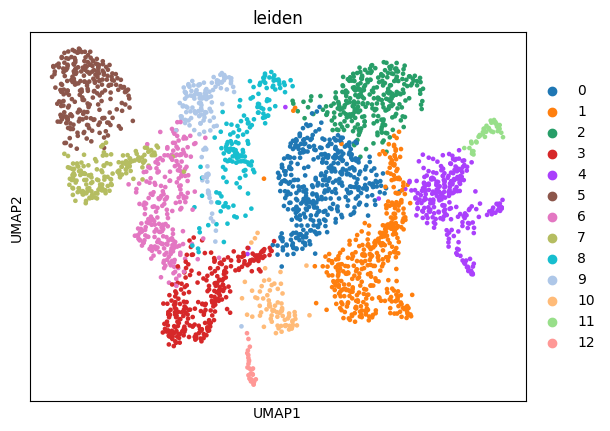

In [10]:
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="leiden")

以上均运行成功

In [11]:

# 7️⃣ UMAP
sc.tl.umap(adata)


In [12]:

# 8️⃣ 聚类
sc.tl.leiden(adata, resolution=0.5)


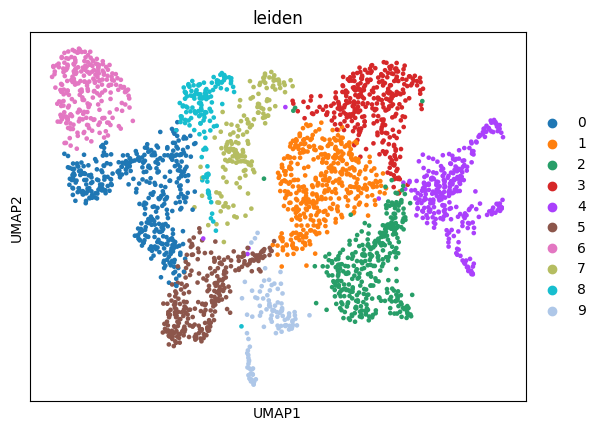

In [13]:

# 9️⃣ 可视化 UMAP
sc.pl.umap(adata, color="leiden")


/tmp/ipykernel_9820/17320318.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color="leiden")


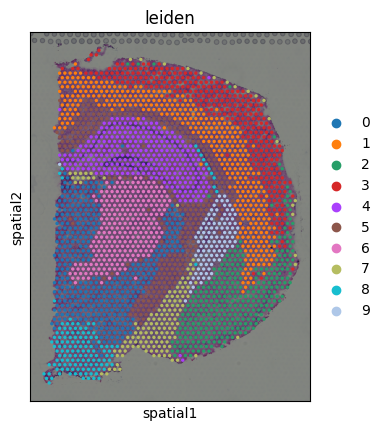

In [14]:

# 🔟 空间可视化
sc.pl.spatial(adata, color="leiden")


In [15]:

# 11️⃣ 空间邻域图
sq.gr.spatial_neighbors(adata)


In [ ]:
# adata.var_names = adata.var_names.astype(str) # 把 var_names 强制转换为普通字符串。 Version 1.0.0 之后，Squidpy 要求 var_names 是普通字符串而不是 pandas 的 Categorical 类型。
# # 12️⃣ 空间自相关分析（Moran’s I）
# sq.gr.spatial_autocorr(adata, mode="moran")


In [21]:
import pandas as pd
import numpy as np

# 取高变基因
hvg = adata.var.index[adata.var["highly_variable"]]

# 强制转为普通 Python list
genes_list = hvg.to_list()

# 再运行
sq.gr.spatial_autocorr(adata, mode="moran", genes=genes_list)

In [22]:

# 13️⃣ 查看空间高变基因
print(adata.uns["moranI"].head())


                I  pval_norm  var_norm  pval_norm_fdr_bh
Mbp      0.788332        0.0  0.000131               0.0
Slc17a7  0.775264        0.0  0.000131               0.0
Nrgn     0.743275        0.0  0.000131               0.0
Cck      0.727492        0.0  0.000131               0.0
Itpka    0.697989        0.0  0.000131               0.0


/tmp/ipykernel_9820/1065642802.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color=top_gene)


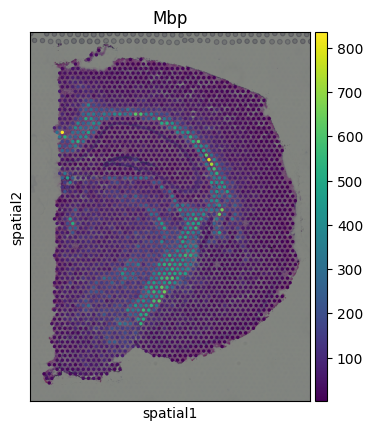

In [23]:

# 14️⃣ 可视化空间高表达基因
top_gene = adata.uns["moranI"].index[0]
sc.pl.spatial(adata, color=top_gene)